In [1]:
import ast
import pandas as pd
import numpy as np
import time
import warnings

from itertools import product
from joblib import Parallel, delayed # for parallelization
from tqdm import tqdm

# Preparation
## Data

In [2]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [3]:
var_list = [
    # Q2
    'clseusa', # 'clsetown', 'clsestat', 'clsenoam',
    # Q3
    'ambornin', 'amcit', 'amlived', 'amenglsh', 
    'amchrstn', 'amgovt', 'amfeel', # 'amancstr',
    # Q4
    'amcitizn', 'amshamed', 'belikeus', 'ambetter', 'ifwrong', # 'amsports', 'lessprd',
    # Q5
    'proudsss', 'proudgrp', 'proudpol', 'prouddem', 'proudeco',
    'proudspt', 'proudart', 'proudhis', 'proudmil', 'proudsci'
]

var_list_f = [var + "_f" for var in var_list]
var_list_n = [var + "_n" for var in var_list]

In [4]:
# Load imputed data
data2004_i = pd.read_parquet("data/data2004_i.parquet") 

In [5]:
# Dataset with categorical outcomes
data_f = data2004_i[var_list_f]

## Label encoding
data_f_oh = data_f.apply(lambda col: LabelEncoder().fit_transform(col))

# Dataset with numeric outcomes
data_n = data2004_i[var_list_n]

## Scaling and normalizing
scaler = MinMaxScaler(feature_range=(-1,1))
data_n_scaled = scaler.fit_transform(data_n)

normalizer = StandardScaler()
data_n_norm = normalizer.fit_transform(data_n)

# Dataset with controls
controls = data2004_i[['sex', 'race_f', 'born_usa', 'party_fs', 'religstr_f', 'reltrad_f', 'region_f']]
controls_dum = pd.get_dummies(controls)

## Parameters

In [6]:
CVI = ['silhouette', 'calinski_harabasz', 'davies_bouldin', 'dunn']
max_clust = 16
max_threads = 8

# 1. Fit models

In [7]:
from src.model_fit import do_StepMix, do_kmeans, do_AHC, do_hdbscan

## 1.1. Latent

With StepMix: https://github.com/Labo-Lacourse/stepmix?tab=readme-ov-file

In [8]:
msrt = ['categorical', 'continuous']
covar = ['without', 'with']
latent_params = list(product(msrt, covar))

clust_range = range(1, max_clust+1)
latent_grid = product(clust_range, latent_params)

In [9]:
time1 = time.time()
results = Parallel(n_jobs=max_threads)(
    delayed(do_StepMix)(
        data_f_oh if msrt == 'categorical' else data_n,
        controls_dum if covar == 'with' else None,
        n, 
        msrt, 
        covar)
    for n, (msrt, covar) in tqdm(latent_grid, desc='Fitting latent models')
)
time2 = time.time()

latent_all = pd.DataFrame(results)

Fitting latent models: 16it [00:00, 21.48it/s]3 [00:00<?, ?it/s]

Fitting StepMix...
Fitting StepMix...
Fitting StepMix...
Fitting StepMix...
Fitting StepMix...
Fitting StepMix...
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [00:00<00:00, 93.01it/s, max_LL=-3.07e+4, max_avg_LL=-25.3]
Fitting latent models: 24it [00:01, 21.32it/s]3 [00:00<?, ?it/s]

Fitting StepMix...
Fitting StepMix...


Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) :  33%|███▎      | 1/3 [01:46<03:32, 106.39s/it, max_LL=-1.36e+4, max_avg_LL=-11.2]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [02:00<00:00, 40.12s/it, max_LL=-2.88e+4, max_avg_LL=-23.7]


Fitting StepMix...


Initializations (n_init) :  33%|███▎      | 1/3 [01:46<03:32, 106.16s/it, max_LL=-1.83e+4, max_avg_LL=-15.1]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [04:33<00:00, 91.02s/it, max_LL=-1.95e+4, max_avg_LL=-16]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [04:56<00:00, 98.91s/it, max_LL=-2.75e+4, max_avg_LL=-22.7]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [05:11<00:00, 103.75s/it, max_LL=-2.72e+4, max_avg_LL=-22.4]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) : 100%|██████████| 3/3 [05:11<00:00, 103.72s/it, max_LL=-1.36e+4, max_avg_LL=-11.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [05:15<00:00, 105.03s/it, max_LL=-1.52e+4, max_avg_LL=-12.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [05:31<00:00, 110.43s/it, max_LL=-2.69e+4, max_avg_LL=-22.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [05:19<00:00, 106.61s/it, max_LL=-1.31e+4, max_avg_LL=-10.8]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Fitting latent models: 48it [09:17, 17.25s/it]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [05:50<00:00, 116.74s/it, max_LL=-2.67e+4, max_avg_LL=-22]6]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [05:49<00:00, 116.52s/it, max_LL=-2.66e+4, max_avg_LL=-21.9]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [05:33<00:00, 111.33s/it, max_LL=-9.65e+3, max_avg_LL=-7.94]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [06:31<00:00, 130.54s/it, max_LL=-8.73e+3, max_avg_LL=-7.19]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Fitting latent models: 56it [11:47, 17.71s/it]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [06:57<00:00, 139.19s/it, max_LL=-2.64e+4, max_avg_LL=-21.7]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [06:43<00:00, 134.51s/it, max_LL=-9.1e+3, max_avg_LL=-7.49]]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :  67%|██████▋   | 2/3 [04:48<02:24, 144.31s/it, max_LL=-2.62e+4, max_avg_LL=-21.6]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:16<00:00, 145.34s/it, max_LL=-2.63e+4, max_avg_LL=-21.6]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [06:51<00:00, 137.24s/it, max_LL=-8.21e+3, max_avg_LL=-6.76]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Fitting latent models: 64it [16:32, 15.50s/it]
Initializations (n_init) : 100%|██████████| 3/3 [07:14<00:00, 144.92s/it, max_LL=-2.62e+4, max_avg_LL=-21.6]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:12<00:00, 144.12s/it, max_LL=-7.3e+3, max_avg_LL=-6].75]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:40<00:00, 153.41s/it, max_LL=-2.61e+4, max_avg_LL=-21.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:28<00:00, 149.48s/it, max_LL=-8.84e+3, max_avg_LL=-7.27]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) : 100%|██████████| 3/3 [08:01<00:00, 160.59s/it, max_LL=-2.6e+4, max_avg_LL=-21.4]]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) : 100%|██████████| 3/3 [07:57<00:00, 159.19s/it, max_LL=-2.59e+4, max_avg_LL=-21.3]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initiali

Total execution time: 1543.86 seconds


Initializations (n_init) : 100%|██████████| 3/3 [07:33<00:00, 151.05s/it, max_LL=-6.68e+3, max_avg_LL=-5.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


In [ ]:
print(f"Total execution time: {time2-time1:.2f} seconds")

In [10]:
LCA_nocov = latent_all[latent_all['params'] == {'msrt': 'categorical', 'covar': 'without'}].reset_index(drop=True)
LCA_covs = latent_all[latent_all['params'] == {'msrt': 'categorical', 'covar': 'with'}].reset_index(drop=True)
improv_LCA = 100 * ((LCA_covs['LL'] / LCA_nocov['LL']) - 1)

LPA_nocov = latent_all[latent_all['params'] == {'msrt': 'continuous', 'covar': 'without'}].reset_index(drop=True)
LPA_covs = latent_all[latent_all['params'] == {'msrt': 'continuous', 'covar': 'with'}].reset_index(drop=True)
improv_LPA = 100 * ((LPA_covs['LL'] / LPA_nocov['LL']) - 1)

improv = pd.DataFrame({
    "n_clust": range(1, len(improv_LCA) + 1),
    "LCA": improv_LCA.round(1),
    "LPA": improv_LPA.round(1)
})

print("Improvement in LL brought by covariates:")
print(improv)

Improvement in LL brought by covariates:
    n_clust  LCA   LPA
0         1  0.0   0.0
1         2 -0.3  -0.2
2         3 -0.5 -18.8
3         4 -0.6  -0.7
4         5 -0.8  27.8
5         6 -0.7  20.5
6         7 -1.0  14.3
7         8 -1.1 -18.4
8         9 -1.4 -18.5
9        10 -1.0  22.9
10       11 -1.0  11.6
11       12 -1.1 -21.7
12       13 -1.3  93.6
13       14 -1.5   5.3
14       15 -1.6 -35.0
15       16 -1.2  16.8


Covariates can be dropped from LCA, as they always decrease its performance. They must be preserved for LPA, as they can significantly improve performance.

## 1.2. k-means

With a custom implementation, as scikit-learn does not allow to change the linkage function.

In [11]:
dist = ['euclidean', 'manhattan', 'chebyshev']
link = ['mean', 'median', 'medoid']
kmeans_params = list(product(dist, link))

clust_range = range(2, max_clust+1)
kmeans_grid = product(clust_range, kmeans_params)

In [12]:
time1 = time.time()
results = Parallel(n_jobs=max_threads)(
    delayed(do_kmeans)(data_n, n, dist, link) 
    for n, (dist, link) in tqdm(kmeans_grid, desc='Fitting KMeans models')
)
time2 = time.time()
print(f"Total execution time: {time2-time1:.2f} seconds")

kmeans_all = pd.DataFrame(results)

Fitting KMeans models: 135it [00:01, 79.45it/s]


Total execution time: 2.37 seconds


## 1.3. AHC

In [13]:
distances = ['manhattan', 'euclidean', 'chebyshev', 'hamming']
linkages = ['single', 'average', 'complete']
ahc_params = [*product(distances, linkages), ('euclidean', 'ward')]

clust_range = range(1, max_clust+1)
ahc_grid = product(clust_range, ahc_params)

In [14]:
time1 = time.time()
results = Parallel(n_jobs=max_threads)(
    delayed(do_AHC)(data_n, n, dist, link) 
    for n, (dist, link) in tqdm(ahc_grid, desc='Fitting AHC models')
)
time2 = time.time()
print(f"Total execution time: {time2-time1:.2f} seconds")

ahc_all = pd.DataFrame(results)

Fitting AHC models: 208it [00:00, 496.20it/s]


Total execution time: 0.87 seconds


## 1.4. HDBSCAN

In [15]:
distances = ['manhattan', 'euclidean', 'chebyshev', 'mahalanobis', 'hamming']
min_cluster_sizes = range(2, 21)
min_samples_range = range(1, 21)
hdb_params = product(distances, min_cluster_sizes, min_samples_range)

In [16]:
time1 = time.time()
results = Parallel(n_jobs=max_threads)(
    delayed(do_hdbscan)(data_n, dist, min_clust, min_smpl)
    for dist, min_clust, min_smpl in tqdm(hdb_params, desc='Fitting HDBSCAN models')
)
time2 = time.time()
print(f"Total execution time: {time2-time1:.2f} seconds")

hdbscan_all = pd.DataFrame(results)

Fitting HDBSCAN models: 1900it [02:00, 15.77it/s] 


Total execution time: 120.79 seconds


## 1.5. Aggregate results and compare CVI

In [17]:
all_models = pd.concat([latent_all, kmeans_all, ahc_all, hdbscan_all]).reset_index(drop=True)
all_models.to_csv("output/models/all_models.csv", index=False)

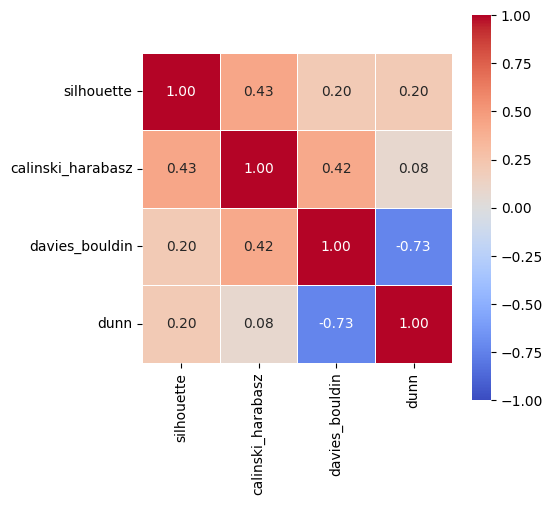

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

all_CVI = all_models[['silhouette', 'calinski_harabasz', 'davies_bouldin', 'dunn']]

correlations = all_CVI.corr(method='spearman')

plt.figure(figsize=(5, 5)) 
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5, vmin=-1, vmax=1)
plt.show()

# 2. Select models

## 2.1. Gap statistics for latent models, kmeans and AHC

In [19]:
all_models = pd.concat([latent_all, kmeans_all, ahc_all]).reset_index(drop=True)

In [20]:
# Import results
# all_models = pd.read_csv('output/models/all_models.csv')
# all_models = all_models[all_models['n_clust'] <= max_clust]
# all_models = all_models[all_models['model'] != 'HDBSCAN']

In [21]:
# Convert params to dictionary to avoid errors afterwards
if isinstance(all_models['params'].iloc[0], str):
    all_models['params'] = all_models['params'].apply(ast.literal_eval)

*Step 1: compute the gap statistic for each model-config*

In [22]:
# Excluding categorical models with covariates
latent_params = list([('categorical', 'without'),
                      ('continuous', 'without'),
                      ('continuous', 'with')])

params = {'kmeans': kmeans_params,
          'AHC': ahc_params,
          'latent': latent_params}

param_names = {'kmeans': ['dist', 'link'],
               'AHC': ['dist', 'link'],
               'latent': ['msrt', 'covar']}

models = ['kmeans', 'AHC', 'latent']

In [23]:
from src.model_select import bootstrap_model

iters = 10

bootstrap_grid = [
    (model, {key: value for key, value in zip(param_names[model], param_values)}, n_val, n_iter)
    for model in models
    for param_values in params[model]
    for n_val in (range(1, max_clust+1) if model == 'latent' else range(2, max_clust+1))
    for n_iter in range(iters)
]

time1 = time.time()
results = Parallel(n_jobs=max_threads)(
    delayed(bootstrap_model)(
        data = data_f_oh if model == 'latent' and config.get('msrt') == 'categorical' else data_n,
        controls = controls_dum if model == 'latent' and config.get('covar') == 'with' else None,
        n = n,
        model = model,
        params = config,
        iter_num = iter_num)
    for model, config, n, iter_num in tqdm(bootstrap_grid, desc='Bootstrapping CVIs')
)
time2 = time.time()

bootstrap_results = pd.concat(results).reset_index(drop=True)

/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters

Fitting StepMix...
Fitting StepMix...
Fitting StepMix...
Fitting StepMix...
Fitting StepMix...
Fitting StepMix...
Fitting StepMix...
Fitting StepMix...
Fitting StepMix...
Fitting StepMix...
Fitting StepMix...


Bootstrapping CVIs:  96%|█████████▋| 3640/3780 [02:16<00:13, 10.30it/s]

Fitting StepMix...
Fitting StepMix...
Fitting StepMix...
Fitting StepMix...


Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...
Fitting StepMix...


Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]68s/it]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]86s/it]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [04:13<00:00, 84.58s/it, max_LL=-4.34e+4, max_avg_LL=-35.7]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [04:12<00:00, 84.21s/it, max_LL=-4.33e+4, max_avg_LL=-35.6]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [04:09<00:00, 83.31s/it, max_LL=-4.34e+4, max_avg_LL=-35.7]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [04:10<00:00, 83.42s/it, max_LL=-4.35e+4, max_avg_LL=-35.8]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [04:12<00:00, 84.10s/it, max_LL=-4.35e+4, max_avg_LL=-35.8]]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [04:11<00:00, 83.88s/it, max_LL=-4.34e+4, max_avg_LL=-35.7]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]74s/it]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [06:43<00:00, 134.55s/it, max_LL=-4.33e+4, max_avg_LL=-35.7]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:05<00:00, 141.89s/it, max_LL=-4.34e+4, max_avg_LL=-35.8]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]7.53s/it, max_LL=-4.33e+4, max_avg_LL=-35.6]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:27<00:00, 149.11s/it, max_LL=-4.33e+4, max_avg_LL=-35.6]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:50<00:00, 156.90s/it, max_LL=-4.34e+4, max_avg_LL=-35.7]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:02<00:00, 140.99s/it, max_LL=-4.34e+4, max_avg_LL=-35.7]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [06:33<00:00, 131.16s/it, max_LL=-4.33e+4, max_avg_LL=-35.6]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:20<00:00, 146.77s/it, max_LL=-4.32e+4, max_avg_LL=-35.6]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Bootstrapping CVIs:  97%|█████████▋| 3672/3780 [19:40<52:03, 28.92s/it]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:42<00:00, 154.02s/it, max_LL=-4.33e+4, max_avg_LL=-35.7]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:04<00:00, 141.47s/it, max_LL=-4.34e+4, max_avg_LL=-35.7]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:20<00:00, 146.69s/it, max_LL=-4.32e+4, max_avg_LL=-35.6]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:45<00:00, 155.15s/it, max_LL=-4.32e+4, max_avg_LL=-35.6]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:22<00:00, 167.42s/it, max_LL=-4.32e+4, max_avg_LL=-35.6]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:04<00:00, 141.35s/it, max_LL=-4.33e+4, max_avg_LL=-35.6]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:39<00:00, 153.31s/it, max_LL=-4.32e+4, max_avg_LL=-35.6]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:18<00:00, 146.11s/it, max_LL=-4.31e+4, max_avg_LL=-35.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]6.68s/it]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:00<00:00, 160.14s/it, max_LL=-4.31e+4, max_avg_LL=-35.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:20<00:00, 146.75s/it, max_LL=-4.32e+4, max_avg_LL=-35.6]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:30<00:00, 170.15s/it, max_LL=-4.32e+4, max_avg_LL=-35.6]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:59<00:00, 159.95s/it, max_LL=-4.33e+4, max_avg_LL=-35.6]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [06:47<00:00, 135.89s/it, max_LL=-4.31e+4, max_avg_LL=-35.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:49<00:00, 156.39s/it, max_LL=-4.31e+4, max_avg_LL=-35.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:20<00:00, 166.97s/it, max_LL=-4.33e+4, max_avg_LL=-35.6]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:43<00:00, 154.62s/it, max_LL=-4.33e+4, max_avg_LL=-35.6]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]3.07s/it]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:25<00:00, 168.42s/it, max_LL=-4.3e+4, max_avg_LL=-35.4]]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:25<00:00, 168.39s/it, max_LL=-4.32e+4, max_avg_LL=-35.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:47<00:00, 155.96s/it, max_LL=-4.32e+4, max_avg_LL=-35.6]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:03<00:00, 141.23s/it, max_LL=-4.31e+4, max_avg_LL=-35.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:16<00:00, 165.66s/it, max_LL=-4.31e+4, max_avg_LL=-35.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:54<00:00, 158.04s/it, max_LL=-4.31e+4, max_avg_LL=-35.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:44<00:00, 175.00s/it, max_LL=-4.32e+4, max_avg_LL=-35.6]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:40<00:00, 173.41s/it, max_LL=-4.31e+4, max_avg_LL=-35.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]9.66s/it]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:27<00:00, 169.33s/it, max_LL=-4.3e+4, max_avg_LL=-35.4]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:12<00:00, 164.11s/it, max_LL=-4.3e+4, max_avg_LL=-35.4]]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:20<00:00, 166.97s/it, max_LL=-4.31e+4, max_avg_LL=-35.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:43<00:00, 174.51s/it, max_LL=-4.31e+4, max_avg_LL=-35.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:31<00:00, 170.55s/it, max_LL=-4.3e+4, max_avg_LL=-35.4] 
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:16<00:00, 165.36s/it, max_LL=-4.3e+4, max_avg_LL=-35.4]]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:55<00:00, 158.42s/it, max_LL=-4.31e+4, max_avg_LL=-35.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:00<00:00, 180.05s/it, max_LL=-4.31e+4, max_avg_LL=-35.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]2.80s/it]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:46<00:00, 175.40s/it, max_LL=-4.31e+4, max_avg_LL=-35.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:52<00:00, 177.48s/it, max_LL=-4.31e+4, max_avg_LL=-35.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:44<00:00, 174.84s/it, max_LL=-4.31e+4, max_avg_LL=-35.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [07:58<00:00, 159.62s/it, max_LL=-4.3e+4, max_avg_LL=-35.4]]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:32<00:00, 170.68s/it, max_LL=-4.31e+4, max_avg_LL=-35.4]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:49<00:00, 176.62s/it, max_LL=-4.3e+4, max_avg_LL=-35.4]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:47<00:00, 175.76s/it, max_LL=-4.3e+4, max_avg_LL=-35.4]]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:00<00:00, 180.24s/it, max_LL=-4.31e+4, max_avg_LL=-35.4]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s] 57.24s/it]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:38<00:00, 172.88s/it, max_LL=-4.3e+4, max_avg_LL=-35.4]]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:11<00:00, 163.78s/it, max_LL=-4.31e+4, max_avg_LL=-35.5]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:08<00:00, 162.96s/it, max_LL=-4.3e+4, max_avg_LL=-35.4] 
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:03<00:00, 181.29s/it, max_LL=-4.29e+4, max_avg_LL=-35.3]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:20<00:00, 186.85s/it, max_LL=-4.3e+4, max_avg_LL=-35.4]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:35<00:00, 191.94s/it, max_LL=-4.3e+4, max_avg_LL=-35.4]]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:38<00:00, 172.98s/it, max_LL=-4.28e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:55<00:00, 198.53s/it, max_LL=-4.29e+4, max_avg_LL=-35.3]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s] 62.40s/it]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:33<00:00, 191.24s/it, max_LL=-4.29e+4, max_avg_LL=-35.3]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:01<00:00, 180.65s/it, max_LL=-4.29e+4, max_avg_LL=-35.3]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:55<00:00, 178.36s/it, max_LL=-4.28e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:52<00:00, 177.40s/it, max_LL=-4.29e+4, max_avg_LL=-35.3]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:19<00:00, 186.36s/it, max_LL=-4.29e+4, max_avg_LL=-35.3]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:36<00:00, 192.00s/it, max_LL=-4.29e+4, max_avg_LL=-35.3]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:26<00:00, 188.83s/it, max_LL=-4.29e+4, max_avg_LL=-35.3]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:48<00:00, 196.22s/it, max_LL=-4.28e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]5.76s/it]  

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:07<00:00, 182.66s/it, max_LL=-4.27e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:37<00:00, 192.51s/it, max_LL=-4.27e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:23<00:00, 187.72s/it, max_LL=-4.3e+4, max_avg_LL=-35.4]]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [08:54<00:00, 178.02s/it, max_LL=-4.28e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:15<00:00, 185.12s/it, max_LL=-4.28e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:34<00:00, 191.65s/it, max_LL=-4.28e+4, max_avg_LL=-35.3]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:07<00:00, 182.54s/it, max_LL=-4.3e+4, max_avg_LL=-35.4]]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:53<00:00, 197.88s/it, max_LL=-4.29e+4, max_avg_LL=-35.3]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]8.29s/it]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:44<00:00, 194.79s/it, max_LL=-4.28e+4, max_avg_LL=-35.3]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:36<00:00, 192.11s/it, max_LL=-4.27e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:51<00:00, 197.19s/it, max_LL=-4.28e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:33<00:00, 191.29s/it, max_LL=-4.28e+4, max_avg_LL=-35.3]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:23<00:00, 187.67s/it, max_LL=-4.28e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:36<00:00, 192.25s/it, max_LL=-4.28e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:11<00:00, 183.74s/it, max_LL=-4.28e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:53<00:00, 197.77s/it, max_LL=-4.28e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]0.05s/it]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:42<00:00, 194.32s/it, max_LL=-4.28e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:59<00:00, 199.89s/it, max_LL=-4.27e+4, max_avg_LL=-35.1]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [10:15<00:00, 205.24s/it, max_LL=-4.27e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:51<00:00, 197.29s/it, max_LL=-4.29e+4, max_avg_LL=-35.3]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:46<00:00, 195.42s/it, max_LL=-4.27e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:59<00:00, 199.91s/it, max_LL=-4.28e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [10:04<00:00, 201.64s/it, max_LL=-4.27e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [10:15<00:00, 205.19s/it, max_LL=-4.28e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]2.12s/it]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [10:04<00:00, 201.58s/it, max_LL=-4.27e+4, max_avg_LL=-35.1]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:51<00:00, 197.15s/it, max_LL=-4.28e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [10:13<00:00, 204.59s/it, max_LL=-4.28e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [10:12<00:00, 204.05s/it, max_LL=-4.27e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:56<00:00, 198.95s/it, max_LL=-4.26e+4, max_avg_LL=-35.1]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [10:18<00:00, 206.23s/it, max_LL=-4.27e+4, max_avg_LL=-35.2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:51<00:00, 197.26s/it, max_LL=-4.26e+4, max_avg_LL=-35]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [10:25<00:00, 208.35s/it, max_LL=-4.26e+4, max_avg_LL=-35]2]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :  67%|██████▋   | 2/3 [06:43<03:21, 201.61s/it, max_LL=-4.27e+4, max_avg_LL=-35.1]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [10:07<00:00, 202.56s/it, max_LL=-4.26e+4, max_avg_LL=-35]1]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [10:16<00:00, 205.34s/it, max_LL=-4.27e+4, max_avg_LL=-35.1]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [10:02<00:00, 200.99s/it, max_LL=-4.26e+4, max_avg_LL=-35.1]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [10:23<00:00, 207.80s/it, max_LL=-4.26e+4, max_avg_LL=-35.1]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:52<00:00, 197.62s/it, max_LL=-4.27e+4, max_avg_LL=-35.1]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:51<00:00, 197.27s/it, max_LL=-4.26e+4, max_avg_LL=-35.1]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:46<00:00, 195.35s/it, max_LL=-4.26e+4, max_avg_LL=-35]  
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:55<00:00, 198.46s/it, max_LL=-4.26e+4, max_avg_LL=-35.1]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]4.08s/it]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:42<00:00, 194.05s/it, max_LL=-4.27e+4, max_avg_LL=-35.1]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:52<00:00, 197.41s/it, max_LL=-4.25e+4, max_avg_LL=-35]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:41<00:00, 193.98s/it, max_LL=-4.25e+4, max_avg_LL=-35]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:34<00:00, 191.61s/it, max_LL=-4.26e+4, max_avg_LL=-35.1]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:59<00:00, 199.97s/it, max_LL=-4.25e+4, max_avg_LL=-35]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:26<00:00, 188.90s/it, max_LL=-4.25e+4, max_avg_LL=-35]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:44<00:00, 194.95s/it, max_LL=-4.25e+4, max_avg_LL=-35]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [10:13<00:00, 204.49s/it, max_LL=-4.26e+4, max_avg_LL=-35]  
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Bootstrapping CVIs: 100%|██████████| 3780/3780 [2:20:45<00:00,  2.23s/it]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [10:01<00:00, 200.63s/it, max_LL=-4.26e+4, max_avg_LL=-35]1]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [10:07<00:00, 202.55s/it, max_LL=-4.26e+4, max_avg_LL=-35]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:58<00:00, 199.51s/it, max_LL=-4.25e+4, max_avg_LL=-35]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:52<00:00, 197.53s/it, max_LL=-4.26e+4, max_avg_LL=-35]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [10:15<00:00, 205.30s/it, max_LL=-4.26e+4, max_avg_LL=-35.1]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:47<00:00, 195.98s/it, max_LL=-4.25e+4, max_avg_LL=-35]1]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [10:07<00:00, 202.54s/it, max_LL=-4.26e+4, max_avg_LL=-35]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [10:18<00:00, 206.26s/it, max_LL=-4.25e+4, max_avg_LL=-35]1]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [10:05<00:00, 201.92s/it, max_LL=-4.26e+4, max_avg_LL=-35.1]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:59<00:00, 199.81s/it, max_LL=-4.25e+4, max_avg_LL=-34.9]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:52<00:00, 197.61s/it, max_LL=-4.26e+4, max_avg_LL=-35]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) :   0%|          | 0/3 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 3/3 [09:46<00:00, 195.42s/it, max_LL=-4.25e+4, max_avg_LL=-35]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) : 100%|██████████| 3/3 [10:10<00:00, 203.62s/it, max_LL=-4.25e+4, max_avg_LL=-35]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Initializations (n_init) : 100%|██████████| 3/3 [10:01<00:00, 200.40s/it, max_LL=-4.24e+4, max_avg_LL=-34.9]
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializati

Total execution time: 9746.42 seconds


In [ ]:
print(f"Total execution time: {time2-time1:.2f} seconds")

In [24]:
from src.model_select import compute_gap_statistics

model_grid = [
    (model, dict(zip(param_names[model], param_values)))
    for model in models
    for param_values in params[model]
]

gap_values = []

for model, config in model_grid:
    rows_id = ((bootstrap_results['model'] == model) & (bootstrap_results['params'] == config))    
    bs_select_res = bootstrap_results[rows_id]
    gap_stats = compute_gap_statistics(bs_select_res, all_models, model, config, CVI)
    gap_values.append(gap_stats)

gap_values = pd.concat(gap_values, ignore_index=True)

*Step 2: identify the optimal number of clusters for each model-config*

In [25]:
# Create df to store results
cols = ['model', 'params', 'n_clust'] + \
       [index for index in CVI] + \
       [f'{index}_gap' for index in CVI]

candidate_models = pd.DataFrame(columns=cols)
candidate_models['model'] = candidate_models['model'].astype('object')
candidate_models['params'] = candidate_models['params'].astype('object')

float_cols = [col for col in cols if col not in ['model', 'params', 'n_clust'] + CVI]
candidate_models[float_cols] = candidate_models[float_cols].astype('float64')
int_cols = [col for col in cols if col in ['n_clust'] + CVI]
candidate_models[int_cols] = candidate_models[int_cols].astype('int64')

In [26]:
# Find best n
from src.model_select import get_best_gap

for model, config in model_grid:
    for index in CVI:
        best_n = get_best_gap(gap_values, model, config, index)

        # Check if a best value has been identified
        if best_n != 'none':
            row_id = ((candidate_models['model'] == model) & 
                      (candidate_models['params'] == config) &
                      (candidate_models['n_clust'] == best_n))
            
            # Check if the corresponding row exists in the df
            if candidate_models[row_id].empty:

                model_id = ((all_models['model'] == model) & 
                           (all_models['params'] == config) &
                           (all_models['n_clust'] == best_n))
                
                new_row = {
                    'model': model,
                    'params': config,
                    'n_clust': best_n,
                    'min_clust_size': all_models.loc[model_id, 'min_clust_size'].values[0],
                    'max_clust_size': all_models.loc[model_id, 'max_clust_size'].values[0],
                    'silhouette': all_models.loc[model_id, 'silhouette'].values[0],
                    'calinski_harabasz': all_models.loc[model_id, 'calinski_harabasz'].values[0],
                    'davies_bouldin': all_models.loc[model_id, 'davies_bouldin'].values[0],
                    'dunn': all_models.loc[model_id, 'dunn'].values[0],
                    f'{index}_gap': 1
                }
                
                new_row = pd.DataFrame([new_row])
                candidate_models = pd.concat([candidate_models, new_row], ignore_index=True)

            # Otherwise, update the existing row
            else:
                candidate_models.loc[row_id, f'{index}_gap'] = 1

In [27]:
candidate_models.to_csv("output/models/candidate_models.csv", index=False)

*Step 3: identify the best model for each class*

In [28]:
CVI_results = {}

for index in CVI:
    CVI_results[index] = []
    df = candidate_models[candidate_models[f'{index}_gap'] == 1]
    
    for model in models:
        sub_df = df[df['model'] == model]

        if sub_df.empty:
            continue
        else:
            if index == 'davies_bouldin':
                best_mod = sub_df.sort_values(index, ascending=True).iloc[0]
            else:
                best_mod = sub_df.sort_values(index, ascending=False).iloc[0]
            CVI_results[index].append(best_mod)

In [29]:
best_sil = pd.DataFrame(CVI_results['silhouette'])
best_ch = pd.DataFrame(CVI_results['calinski_harabasz'])
best_db = pd.DataFrame(CVI_results['davies_bouldin'])
best_dunn = pd.DataFrame(CVI_results['dunn'])

## 2.2. Min/max for HDBSCAN

In [30]:
best_sil = pd.concat([best_sil, hdbscan_all.sort_values('silhouette', ascending=False).iloc[0:1]], axis=0)
best_ch = pd.concat([best_ch, hdbscan_all.sort_values('calinski_harabasz', ascending=False).iloc[0:1]], axis=0)
best_db = pd.concat([best_db, hdbscan_all.sort_values('davies_bouldin', ascending=True).iloc[0:1]], axis=0)
best_dunn = pd.concat([best_dunn, hdbscan_all.sort_values('dunn', ascending=False).iloc[0:1]], axis=0)

In [31]:
best_sil = best_sil.drop(columns=[col for col in best_sil.columns if col.endswith(('elbow', 'abs', 'gap'))])
best_ch = best_ch.drop(columns=[col for col in best_ch.columns if col.endswith(('elbow', 'abs', 'gap'))])
best_db = best_db.drop(columns=[col for col in best_db.columns if col.endswith(('elbow', 'abs', 'gap'))])
best_dunn = best_dunn.drop(columns=[col for col in best_dunn.columns if col.endswith(('elbow', 'abs', 'gap'))])

## 2.3. Fit criteria for latent models

In [32]:
latent_stats = latent_all.drop(columns=['silhouette', 'calinski_harabasz', 'davies_bouldin', 'dunn'])

In [33]:
def disp_params(d):
    return f"{d['msrt']} {d['covar']} covariates"

### 2.3.1. Absolute value for AIC / BIC / entropy

In [34]:
best_aic = latent_all.sort_values('aic', ascending=True).iloc[0]
best_bic = latent_all.sort_values('bic', ascending=True).iloc[0]
best_entropy = latent_all.sort_values('entropy', ascending=False).iloc[0]

print(f"Model minimizing AIC is {disp_params(best_aic['params'])} with {best_aic['n_clust']} clusters.")
print(f"Model minimizing BIC is {disp_params(best_bic['params'])} with {best_bic['n_clust']} clusters.")
print(f"Model maximizing entropy is {disp_params(best_entropy['params'])} with {best_entropy['n_clust']} clusters.")

Model minimizing AIC is continuous without covariates with 14 clusters.
Model minimizing BIC is continuous without covariates with 14 clusters.
Model maximizing entropy is categorical without covariates with 8 clusters.


### 2.3.2. Elbow method for AIC / BIC / entropy

In [35]:
from kneed import KneeLocator

def elbow_method(df, val_index):
    res = df.dropna(subset=[val_index])
    x = res['n_clust']
    y = res[val_index]

    if val_index == 'entropy':
        knee_locator = KneeLocator(x, y, curve='concave', direction='increasing')
    else:
        knee_locator = KneeLocator(x, y, curve='convex', direction='decreasing')
    
    return res[res["n_clust"] == knee_locator.knee]

def best_elbow_model(index):
    candidate_models = pd.DataFrame()

    for msrt in ['categorical', 'continuous']:
        for covar in ['without', 'with']:
            mask = (latent_stats['params'] == {'msrt': msrt, 'covar': covar})
            models = latent_stats[mask]
            elbow_res = elbow_method(models, index)
            if elbow_res is not None:
                candidate_models = pd.concat([candidate_models, elbow_res], ignore_index=True)
    
    if candidate_models.empty:
        return None
    return candidate_models.sort_values(index, ascending=True).iloc[0]

In [36]:
best_aic = best_elbow_model('aic')
best_bic = best_elbow_model('bic')
best_entropy = best_elbow_model('entropy')

print(f"Best model according to the Elbow method applied to...")

if best_aic is None: print("- AIC is None")
else: print(f"- AIC is {disp_params(best_aic['params'])} with {best_aic['n_clust']} clusters.")

if best_bic is None: print("- BIC is None")
else: print(f"- BIC is {disp_params(best_bic['params'])} with {best_bic['n_clust']} clusters.")
    
if best_entropy is None: print("Entropy is None")
else: print(f"- Entropy is {disp_params(best_entropy['params'])} with {best_entropy['n_clust']} clusters")

Best model according to the Elbow method applied to...
- AIC is continuous without covariates with 5 clusters.
- BIC is continuous without covariates with 5 clusters.
- Entropy is continuous without covariates with 4 clusters


### 2.3.3. Statistical tests for log-likelihood
*LRT - not advisable for comparing models with $k$ and $k-1$ classes as the resulting test statistics does not follow the $\chi^2$ distribution under the null hypothesis. The implementation below compare models to the 1-class model, which is sometimes recommended, without a formal justification.*

In [37]:
from scipy.stats import chi2

def LRT(models):
    l2_red = (models['LL'].iloc[0] - models['LL']) / models['LL'].iloc[0]
    lik_rat = 2 * (models['LL'] - models['LL'].iloc[0])
    d_df = models['df'] - models['df'].iloc[0]
    p_val = 1 - chi2.cdf(lik_rat, d_df)

    results = pd.DataFrame({
        'L2 reduction': l2_red,
        'LR ratio': lik_rat,
        'LR pval': p_val
    }, index=models.index)
    
    return results

In [38]:
for msrt in ['categorical', 'continuous']:
    for covar in ['without', 'with']:
        mask = (latent_stats['params'] == {'msrt': msrt, 'covar': covar})
        models = latent_stats[mask]
        lrt_results = LRT(models)
        latent_stats.loc[mask, ['L2 reduction', 'LR ratio', 'LR pval']] = lrt_results.values

*BLRT - not implemented in StepMix for models with covariates.*

In [39]:
from stepmix.stepmix import StepMix
from stepmix.bootstrap import blrt_sweep

iters = 10

opt_params = {
    'method': 'gradient',
    'intercept': True,
    'max_iter': 1000,
}

time1 = time.time()
for msrt in ['categorical', 'continuous']:
    latent_mod = StepMix(
        measurement = msrt,
        n_init = 3,
        init_params = 'kmeans',
        structural_params = opt_params,
        progress_bar = 0)
 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)

        blrt = blrt_sweep(
            latent_mod,
            data_f_oh if msrt == 'categorical' else data_n,
            low=1,
            high=max_clust,
            n_repetitions=iters)
            
        blrt = pd.concat([pd.DataFrame({'p': [np.nan]}), blrt]).reset_index(drop=True) # Add a row for the saturated model

    mask = (latent_stats['params'] == {'msrt': msrt, 'covar': 'without'})
    latent_stats.loc[mask, ['BLR pval']] = blrt.values
time2 = time.time()

Testing 1 vs. 2 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:00<00:00, 50.49it/s, max_LL=-3.04e+4, median_LL=-3.07e+4, min_LL=-3.09e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:02<00:00,  3.56it/s, max_LL=-3.03e+4, median_LL=-3.07e+4, min_LL=-3.09e+4]


Testing 2 vs. 3 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:03<00:00,  2.80it/s, max_LL=-2.85e+4, median_LL=-2.88e+4, min_LL=-2.92e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:04<00:00,  2.01it/s, max_LL=-2.85e+4, median_LL=-2.88e+4, min_LL=-2.91e+4]


Testing 3 vs. 4 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:03<00:00,  3.00it/s, max_LL=-2.79e+4, median_LL=-2.82e+4, min_LL=-2.92e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:14<00:00,  1.48s/it, max_LL=-2.78e+4, median_LL=-2.81e+4, min_LL=-2.84e+4]


Testing 4 vs. 5 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:07<00:00,  1.39it/s, max_LL=-2.72e+4, median_LL=-2.76e+4, min_LL=-2.86e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:12<00:00,  1.22s/it, max_LL=-2.72e+4, median_LL=-2.75e+4, min_LL=-2.79e+4]


Testing 5 vs. 6 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:10<00:00,  1.05s/it, max_LL=-2.69e+4, median_LL=-2.73e+4, min_LL=-2.75e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:15<00:00,  1.52s/it, max_LL=-2.68e+4, median_LL=-2.71e+4, min_LL=-2.74e+4]


Testing 6 vs. 7 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:15<00:00,  1.57s/it, max_LL=-2.67e+4, median_LL=-2.73e+4, min_LL=-2.75e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:16<00:00,  1.66s/it, max_LL=-2.67e+4, median_LL=-2.72e+4, min_LL=-2.74e+4]


Testing 7 vs. 8 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:11<00:00,  1.18s/it, max_LL=-2.65e+4, median_LL=-2.68e+4, min_LL=-2.72e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:15<00:00,  1.58s/it, max_LL=-2.65e+4, median_LL=-2.67e+4, min_LL=-2.71e+4]


Testing 8 vs. 9 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:13<00:00,  1.31s/it, max_LL=-2.62e+4, median_LL=-2.68e+4, min_LL=-2.71e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:16<00:00,  1.69s/it, max_LL=-2.63e+4, median_LL=-2.66e+4, min_LL=-2.71e+4]


Testing 9 vs. 10 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:15<00:00,  1.57s/it, max_LL=-2.61e+4, median_LL=-2.63e+4, min_LL=-2.7e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:17<00:00,  1.72s/it, max_LL=-2.61e+4, median_LL=-2.62e+4, min_LL=-2.68e+4]


Testing 10 vs. 11 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:18<00:00,  1.89s/it, max_LL=-2.6e+4, median_LL=-2.63e+4, min_LL=-2.66e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:22<00:00,  2.26s/it, max_LL=-2.6e+4, median_LL=-2.63e+4, min_LL=-2.64e+4]


Testing 11 vs. 12 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:22<00:00,  2.28s/it, max_LL=-2.6e+4, median_LL=-2.62e+4, min_LL=-2.68e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:21<00:00,  2.17s/it, max_LL=-2.59e+4, median_LL=-2.61e+4, min_LL=-2.65e+4]


Testing 12 vs. 13 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:20<00:00,  2.08s/it, max_LL=-2.54e+4, median_LL=-2.6e+4, min_LL=-2.67e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:19<00:00,  1.95s/it, max_LL=-2.52e+4, median_LL=-2.59e+4, min_LL=-2.64e+4]


Testing 13 vs. 14 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:20<00:00,  2.03s/it, max_LL=-2.56e+4, median_LL=-2.59e+4, min_LL=-2.62e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:25<00:00,  2.51s/it, max_LL=-2.54e+4, median_LL=-2.59e+4, min_LL=-2.62e+4]


Testing 14 vs. 15 classes...


/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:25<00:00,  2.51s/it, max_LL=-2.55e+4, median_LL=-2.59e+4, min_LL=-2.62e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:23<00:00,  2.32s/it, max_LL=-2.54e+4, median_LL=-2.57e+4, min_LL=-2.61e+4]


Testing 15 vs. 16 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:20<00:00,  2.08s/it, max_LL=-2.55e+4, median_LL=-2.58e+4, min_LL=-2.64e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:20<00:00,  2.08s/it, max_LL=-2.55e+4, median_LL=-2.57e+4, min_LL=-2.62e+4]



BLRT Sweep Results
                     p
Test                  
1 vs. 2 classes    0.0
2 vs. 3 classes    0.0
3 vs. 4 classes    0.2
4 vs. 5 classes    0.1
5 vs. 6 classes    0.1
6 vs. 7 classes    0.1
7 vs. 8 classes    0.0
8 vs. 9 classes    0.4
9 vs. 10 classes   1.0
10 vs. 11 classes  1.0
11 vs. 12 classes  1.0
12 vs. 13 classes  1.0
13 vs. 14 classes  0.5
14 vs. 15 classes  0.7
15 vs. 16 classes  0.6
Testing 1 vs. 2 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:00<00:00, 139.60it/s, max_LL=-3.91e+4, median_LL=-3.92e+4, min_LL=-3.95e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
/Users/mael/.pyenv/versions/3.12.9/envs/jupyter/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters

Testing 2 vs. 3 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:00<00:00, 22.96it/s, max_LL=-2.65e+4, median_LL=-2.71e+4, min_LL=-2.77e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:03<00:00,  2.91it/s, max_LL=-2.64e+4, median_LL=-2.7e+4, min_LL=-2.77e+4]


Testing 3 vs. 4 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:00<00:00, 18.69it/s, max_LL=-2.06e+4, median_LL=-2.1e+4, min_LL=-2.18e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  6.98it/s, max_LL=-2.06e+4, median_LL=-2.09e+4, min_LL=-2.17e+4]


Testing 4 vs. 5 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:00<00:00, 24.45it/s, max_LL=-2.01e+4, median_LL=-2.08e+4, min_LL=-2.18e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  5.67it/s, max_LL=-2.01e+4, median_LL=-2.07e+4, min_LL=-2.16e+4]


Testing 5 vs. 6 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:00<00:00, 17.17it/s, max_LL=-1.2e+4, median_LL=-1.31e+4, min_LL=-1.38e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  8.57it/s, max_LL=-1.2e+4, median_LL=-1.3e+4, min_LL=-1.38e+4] 


Testing 6 vs. 7 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  7.85it/s, max_LL=-1.56e+4, median_LL=-1.63e+4, min_LL=-1.69e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  8.56it/s, max_LL=-1.56e+4, median_LL=-1.62e+4, min_LL=-1.69e+4]


Testing 7 vs. 8 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  6.44it/s, max_LL=-1.43e+4, median_LL=-1.58e+4, min_LL=-1.66e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  6.22it/s, max_LL=-1.42e+4, median_LL=-1.55e+4, min_LL=-1.65e+4]


Testing 8 vs. 9 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  8.15it/s, max_LL=-1.35e+4, median_LL=-1.37e+4, min_LL=-1.44e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  6.22it/s, max_LL=-1.31e+4, median_LL=-1.35e+4, min_LL=-1.46e+4]


Testing 9 vs. 10 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  5.10it/s, max_LL=-1.15e+4, median_LL=-1.28e+4, min_LL=-1.5e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:02<00:00,  3.71it/s, max_LL=-1.15e+4, median_LL=-1.26e+4, min_LL=-1.38e+4]


Testing 10 vs. 11 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  7.61it/s, max_LL=-1.04e+4, median_LL=-1.13e+4, min_LL=-1.21e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  5.76it/s, max_LL=-1.03e+4, median_LL=-1.12e+4, min_LL=-1.22e+4]


Testing 11 vs. 12 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  7.40it/s, max_LL=-7.98e+3, median_LL=-9.9e+3, min_LL=-1.08e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  6.99it/s, max_LL=-7.93e+3, median_LL=-9.71e+3, min_LL=-1.13e+4]


Testing 12 vs. 13 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  5.42it/s, max_LL=-9.6e+3, median_LL=-1.04e+4, min_LL=-1.13e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:02<00:00,  3.52it/s, max_LL=-9.68e+3, median_LL=-1.01e+4, min_LL=-1.12e+4]


Testing 13 vs. 14 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  8.56it/s, max_LL=-4.12e+3, median_LL=-5.32e+3, min_LL=-1.03e+4]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  6.43it/s, max_LL=-3.81e+3, median_LL=-4.66e+3, min_LL=-6e+3]  


Testing 14 vs. 15 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  6.27it/s, max_LL=-8.58e+3, median_LL=-9.14e+3, min_LL=-9.85e+3]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  7.48it/s, max_LL=-8.1e+3, median_LL=-9.03e+3, min_LL=-9.82e+3]


Testing 15 vs. 16 classes...
Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  6.11it/s, max_LL=-7.3e+3, median_LL=-8.14e+3, min_LL=-9.05e+3]



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|██████████| 10/10 [00:01<00:00,  7.10it/s, max_LL=-7.51e+3, median_LL=-7.83e+3, min_LL=-9.02e+3]


BLRT Sweep Results
                     p
Test                  
1 vs. 2 classes    0.0
2 vs. 3 classes    0.0
3 vs. 4 classes    0.0
4 vs. 5 classes    0.0
5 vs. 6 classes    1.0
6 vs. 7 classes    0.0
7 vs. 8 classes    0.0
8 vs. 9 classes    0.0
9 vs. 10 classes   0.2
10 vs. 11 classes  0.9
11 vs. 12 classes  1.0
12 vs. 13 classes  0.3
13 vs. 14 classes  1.0
14 vs. 15 classes  0.0
15 vs. 16 classes  0.0
Total execution time: 574.97 seconds


In [ ]:
print(f"Total execution time: {time2-time1:.2f} seconds")

In [40]:
LCA = latent_stats[latent_stats['params'] == {'msrt': 'categorical', 'covar': 'without'}].reset_index(drop=True)
LPA = latent_stats[latent_stats['params'] == {'msrt': 'continuous', 'covar': 'without'}].reset_index(drop=True)

LCA.to_csv("output/models/bootstrapped_LCA.csv", index=False)
LPA.to_csv("output/models/bootstrapped_LPA.csv", index=False)

*Results*

In [41]:
if LCA[LCA['BLR pval'] > 0.05].empty:
    best_LCA = None
else:
    best_LCA = LCA[LCA['BLR pval'] > 0.05].iloc[0]['n_clust']

if LPA[LPA['BLR pval'] > 0.05].empty:
    best_LPA = None
else:
    best_LPA = LPA[LPA['BLR pval'] > 0.05].iloc[0]['n_clust']    

print(f"Optimal number of clusters for LCA according to BLRT is {best_LCA}.")
print(f"Optimal number of clusters for LPA according to BLRT is {best_LPA}.")

Optimal number of clusters for LCA according to BLRT is 4.
Optimal number of clusters for LPA according to BLRT is 6.


In [42]:
LCA.drop(columns=['model', 'params', 'aic', 'bic', 'entropy'])

,n_clust,min_clust_size,max_clust_size,df,LL,L2 reduction,LR ratio,LR pval,BLR pval
0,1,1215,1215,92.0,-25.300404,-0.000000,0.000000,NaN,NaN
1,2,425,790,185.0,-23.780682,0.060067,3.039444,1.0,0.0
2,3,253,527,278.0,-23.209650,0.082637,4.181508,1.0,0.0
3,4,105,432,371.0,-22.804706,0.098643,4.991396,1.0,0.2
4,5,97,433,464.0,-22.534559,0.109320,5.531691,1.0,0.1
5,6,60,418,557.0,-22.332656,0.117300,5.935496,1.0,0.1
6,7,75,327,650.0,-22.211359,0.122095,6.178090,1.0,0.1
7,8,62,244,743.0,-22.118674,0.125758,6.363460,1.0,0.0
8,9,70,225,836.0,-22.008814,0.130100,6.583180,1.0,0.4
9,10,40,201,929.0,-21.863593,0.135840,6.873622,1.0,1.0


In [43]:
LPA.drop(columns=['model', 'params', 'aic', 'bic', 'entropy'])

,n_clust,min_clust_size,max_clust_size,df,LL,L2 reduction,LR ratio,LR pval,BLR pval
0,1,1215,1215,46.0,-32.228055,-0.000000,0.000000,NaN,NaN
1,2,384,831,93.0,-21.416884,0.335458,21.622343,0.999445,0.0
2,3,249,695,140.0,-19.982237,0.379974,24.491636,1.000000,0.0
3,4,155,568,187.0,-16.127673,0.499577,32.200764,1.000000,0.0
4,5,145,437,234.0,-8.778466,0.727614,46.899179,1.000000,0.0
5,6,76,453,281.0,-10.377462,0.677999,43.701188,1.000000,1.0
6,7,14,465,328.0,-9.417010,0.707801,45.622091,1.000000,0.0
7,8,31,536,375.0,-9.730738,0.698066,44.994634,1.000000,0.0
8,9,23,488,422.0,-8.816191,0.726444,46.823728,1.000000,0.0
9,10,18,417,469.0,-6.096038,0.810847,52.264034,1.000000,0.2


# 3. Results

In [44]:
from src.model_plot import plot_clusters, plot_cluster_profiles

In [45]:
def refit_best_model(df):
    model = df.loc[0, 'model']
    config = df.loc[0, 'params']
    n_clust = int(df.loc[0, 'n_clust'])

    if model == 'latent':
        results = do_StepMix(data_f_oh if config['msrt'] == 'categorical' else data_n, n_clust, refit = True, **config)
    
    elif model == 'kmeans':
        results = do_kmeans(data_n, n_clust, refit = True, **config)
    
    elif model == 'AHC':
        results = do_AHC(data_n, n_clust, refit = True, **config)
    
    elif model == 'HDBSCAN':
        results = do_hdbscan(data_n, refit = True, **config)

    return results

## 3.1. Silhouette

In [46]:
sil = best_sil.sort_values('silhouette', ascending=False).drop(columns=['calinski_harabasz', 'davies_bouldin', 'dunn']).reset_index(drop=True)
sil

,model,params,n_clust,silhouette,min_clust_size,max_clust_size,noise
0,HDBSCAN,"{'dist': 'hamming', 'min_clust': 2, 'min_smpl'...",2,0.472527,4.0,1204.0,0.329218
1,AHC,"{'dist': 'manhattan', 'link': 'single'}",8,0.337520,1.0,1208.0,NaN
2,kmeans,"{'dist': 'manhattan', 'link': 'mean'}",10,0.104110,22.0,402.0,NaN
3,latent,"{'msrt': 'categorical', 'covar': 'without'}",3,0.094978,253.0,527.0,NaN


In [47]:
pred_clust_sil = refit_best_model(sil)

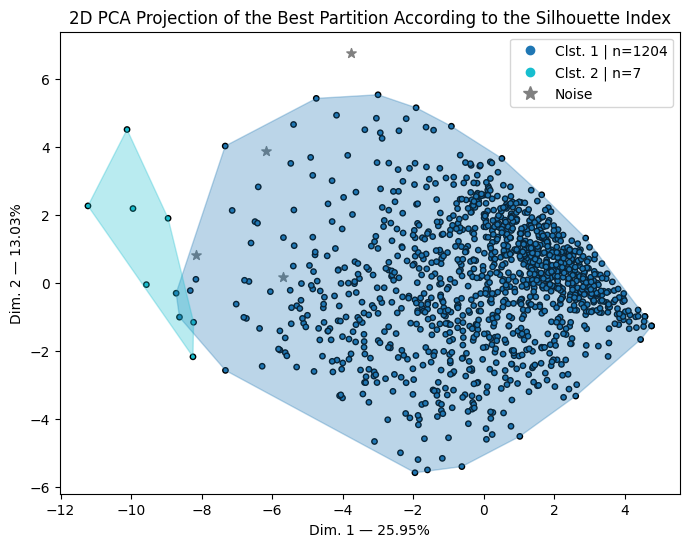

In [48]:
plot_clusters(
    data_f_oh if (sil.loc[0, 'model'] == 'latent') and (sil.loc[0, 'params'].get('msrt') == 'categorical') else data_n,
    pred_clust_sil,
    '2D PCA Projection of the Best Partition According to the Silhouette Index')

In [49]:
if np.unique(pred_clust_sil, return_counts=True)[1].min() > 5:
    plot_cluster_profiles(data_n, pred_clust_sil, feature_names = var_list, sd = 1, title = 'Silhouette')

## 3.2. Calinski-Harabasz

In [50]:
ch = best_ch.sort_values('calinski_harabasz', ascending=False).drop(columns=['silhouette', 'davies_bouldin', 'dunn']).reset_index(drop=True)
ch

,model,params,n_clust,calinski_harabasz,min_clust_size,max_clust_size,noise
0,kmeans,"{'dist': 'manhattan', 'link': 'medoid'}",3,148.882452,223.0,531.0,NaN
1,HDBSCAN,"{'dist': 'manhattan', 'min_clust': 3, 'min_smp...",2,102.056114,5.0,859.0,28.888889
2,AHC,"{'dist': 'euclidean', 'link': 'ward'}",12,65.245637,20.0,197.0,NaN
3,latent,"{'msrt': 'categorical', 'covar': 'without'}",11,45.434011,48.0,180.0,NaN


In [51]:
pred_clust_ch = refit_best_model(ch)

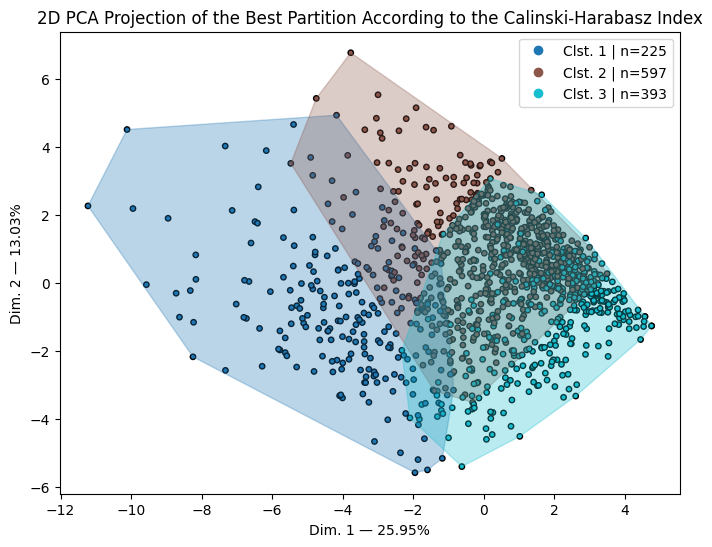

In [52]:
plot_clusters(
    data_f_oh if (ch.loc[0, 'model'] == 'latent') and (ch.loc[0, 'params'].get('msrt') == 'categorical') else data_n, 
    pred_clust_ch,
    '2D PCA Projection of the Best Partition According to the Calinski-Harabasz Index')

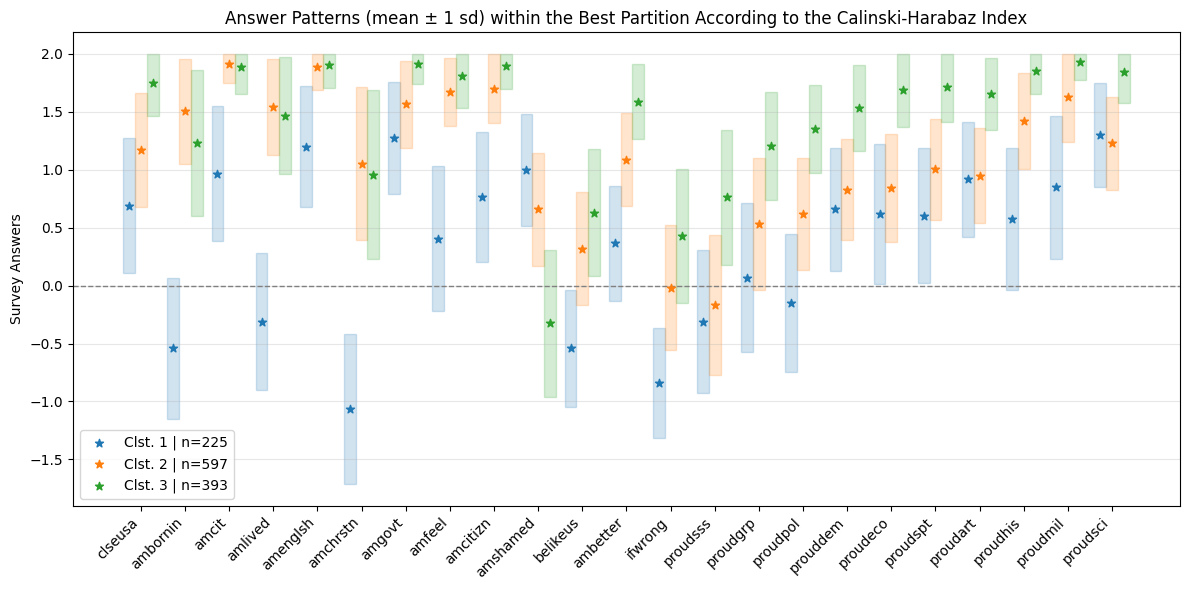

In [53]:
if np.unique(pred_clust_ch, return_counts=True)[1].min() > 5:
    plot_cluster_profiles(data_n, pred_clust_ch, feature_names = var_list, sd = 1, title = 'Calinski-Harabaz')

## 3.3. Davies-Bouldin

In [54]:
db = best_db.sort_values('davies_bouldin', ascending=True).drop(columns=['silhouette', 'calinski_harabasz', 'dunn']).reset_index(drop=True)
db

,model,params,n_clust,davies_bouldin,min_clust_size,max_clust_size,noise
0,AHC,"{'dist': 'chebyshev', 'link': 'single'}",5,0.451731,1.0,1211.0,NaN
1,HDBSCAN,"{'dist': 'mahalanobis', 'min_clust': 2, 'min_s...",2,1.027845,2.0,1208.0,99.423868
2,kmeans,"{'dist': 'chebyshev', 'link': 'medoid'}",12,2.241968,1.0,885.0,NaN
3,latent,"{'msrt': 'categorical', 'covar': 'without'}",11,3.941865,48.0,180.0,NaN


In [55]:
pred_clust_db = refit_best_model(db)

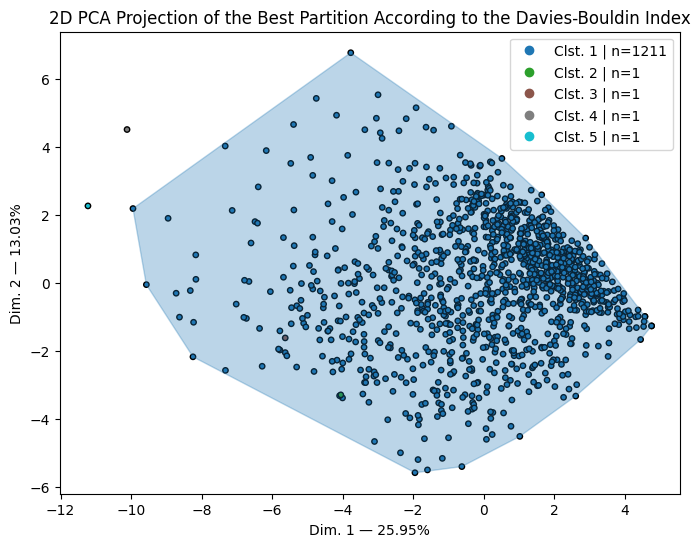

In [56]:
plot_clusters(
    data_f_oh if (db.loc[0, 'model'] == 'latent') and (db.loc[0, 'params'].get('msrt') == 'categorical') else data_n, 
    pred_clust_db,
    '2D PCA Projection of the Best Partition According to the Davies-Bouldin Index')

In [57]:
if np.unique(pred_clust_db, return_counts=True)[1].min() > 5:
    plot_cluster_profiles(data_n, pred_clust_db, feature_names = var_list, sd = 1, title = 'Davies-Bouldin')

## 3.4. Generalized Dunn 43

In [58]:
gd = best_dunn.sort_values('dunn', ascending=False).drop(columns=['silhouette', 'calinski_harabasz', 'davies_bouldin']).reset_index(drop=True)
gd

,model,params,n_clust,dunn,min_clust_size,max_clust_size,noise
0,AHC,"{'dist': 'hamming', 'link': 'single'}",2,2.108809,1.0,1214.0,NaN
1,HDBSCAN,"{'dist': 'hamming', 'min_clust': 4, 'min_smpl'...",2,1.372604,2.0,1205.0,0.164609
2,kmeans,"{'dist': 'euclidean', 'link': 'medoid'}",3,0.582348,247.0,542.0,NaN
3,latent,"{'msrt': 'categorical', 'covar': 'without'}",8,0.265566,62.0,244.0,NaN


In [59]:
pred_clust_gd = refit_best_model(gd)

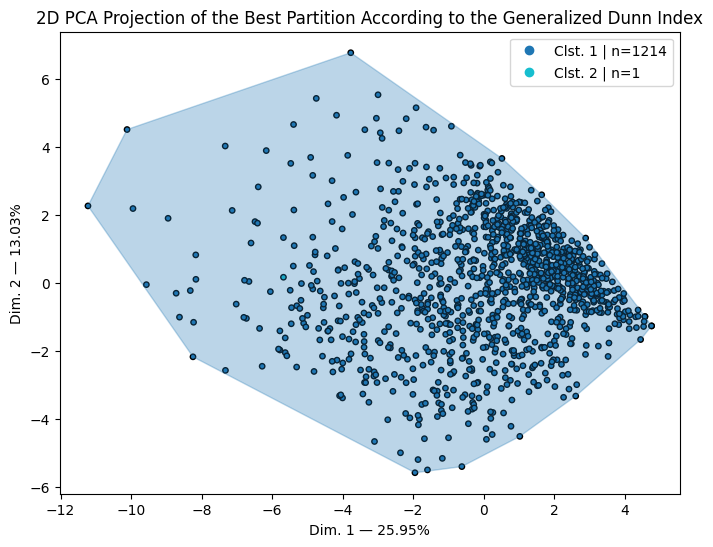

In [60]:
plot_clusters(
    data_f_oh if (gd.loc[0, 'model'] == 'latent') and (gd.loc[0, 'params'].get('msrt') == 'categorical') else data_n, 
    pred_clust_gd,
    '2D PCA Projection of the Best Partition According to the Generalized Dunn Index')

In [61]:
if np.unique(pred_clust_gd, return_counts=True)[1].min() > 5:
    plot_cluster_profiles(data_n, pred_clust_gd, feature_names = var_list, sd = 1, title = 'Generalized Dunn')

# 4. Clusterability - Hopkins Statistic

Function from the pyclustertend package, which could not be installed because its depencies are outdated.
See: https://pyclustertend.readthedocs.io/en/latest/_modules/pyclustertend/hopkins.html

In [62]:
from src.hopkins import hopkins

In [63]:
hopkins_stat = hopkins(data_n.values, data_n.shape[0])
print(f"Hopkins stat on restricted data set: {hopkins_stat:.3f}")

full_var_list = var_list + ['clsetown', 'clsestat', 'clsenoam', 'amancstr', 'amsports', 'lessprd']
full_var_list_n = [var + "_n" for var in full_var_list]
data_n_full = data2004_i[full_var_list_n]
hopkins_stat = hopkins(data_n_full.values, data_n.shape[0])
print(f"Hopkins stat on full data set: {hopkins_stat:.3f}")

Hopkins stat on restricted data set: 0.358
Hopkins stat on full data set: 0.382


The inclusion of questions discared by the authors slighly improves clusterability.